# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function


<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [4]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [10]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

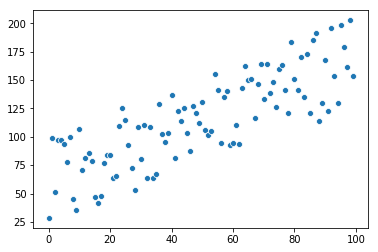

In [11]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1068.954406
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 757.596969
[1.91355201 1.83866943]
Iteration 2 | Cost: 720.893901
[1.91813704 1.94309637]
Iteration 3 | Cost: 716.532057
[1.92168733 1.97890074]
Iteration 4 | Cost: 715.978475
[1.92488244 1.99115724]
Iteration 5 | Cost: 715.873329
[1.92795558 1.99533326]
Iteration 6 | Cost: 715.820992
[1.93098676 1.99673647]
Iteration 7 | Cost: 715.774877
[1.93400344 1.99718818]
Iteration 8 | Cost: 715.729499
[1.93701505 1.99731338]
Iteration 9 | Cost: 715.684211
[1.94002481 1.99732655]
Iteration 10 | Cost: 715.638938
[1.94303384 1.99730128]
Iteration 11 | Cost: 715.593671
[1.94604252 1.99726281]
Iteration 12 | Cost: 715.548409
[1.94905098 1.99721982]
Iteration 13 | Cost: 715.503152
[1.95205927 1.99717528]
Iteration 14 | Cost: 715.457899
[1.95506739 1.9971302 ]
Iteration 15 | Cost: 715.412650
[1.95807535 1.99708495]
Iteration 16 | Cost: 715.367406
[1.96108317 1.99703963]
Iteration 17 | Cost: 715.322167
[1.96409083 1.9969943 ]
I

[3.78810654 1.96949446]
Iteration 634 | Cost: 688.266881
[3.79102149 1.96945051]
Iteration 635 | Cost: 688.224392
[3.7939363  1.96940656]
Iteration 636 | Cost: 688.181907
[3.79685096 1.96936262]
Iteration 637 | Cost: 688.139427
[3.79976546 1.96931868]
Iteration 638 | Cost: 688.096951
[3.80267983 1.96927474]
Iteration 639 | Cost: 688.054479
[3.80559404 1.96923081]
Iteration 640 | Cost: 688.012011
[3.80850811 1.96918687]
Iteration 641 | Cost: 687.969548
[3.81142202 1.96914294]
Iteration 642 | Cost: 687.927089
[3.81433579 1.96909901]
Iteration 643 | Cost: 687.884635
[3.81724942 1.96905508]
Iteration 644 | Cost: 687.842185
[3.82016289 1.96901116]
Iteration 645 | Cost: 687.799739
[3.82307622 1.96896724]
Iteration 646 | Cost: 687.757297
[3.8259894  1.96892331]
Iteration 647 | Cost: 687.714860
[3.82890243 1.9688794 ]
Iteration 648 | Cost: 687.672427
[3.83181531 1.96883548]
Iteration 649 | Cost: 687.629998
[3.83472804 1.96879157]
Iteration 650 | Cost: 687.587574
[3.83764063 1.96874765]
Iterati

Iteration 1063 | Cost: 670.429288
[5.02799201 1.95080127]
Iteration 1064 | Cost: 670.388609
[5.03084405 1.95075827]
Iteration 1065 | Cost: 670.347935
[5.03369594 1.95071528]
Iteration 1066 | Cost: 670.307264
[5.03654769 1.95067228]
Iteration 1067 | Cost: 670.266597
[5.0393993  1.95062929]
Iteration 1068 | Cost: 670.225935
[5.04225076 1.9505863 ]
Iteration 1069 | Cost: 670.185277
[5.04510207 1.95054331]
Iteration 1070 | Cost: 670.144623
[5.04795324 1.95050033]
Iteration 1071 | Cost: 670.103973
[5.05080427 1.95045734]
Iteration 1072 | Cost: 670.063327
[5.05365515 1.95041436]
Iteration 1073 | Cost: 670.022685
[5.05650589 1.95037138]
Iteration 1074 | Cost: 669.982048
[5.05935648 1.9503284 ]
Iteration 1075 | Cost: 669.941414
[5.06220693 1.95028543]
Iteration 1076 | Cost: 669.900785
[5.06505723 1.95024246]
Iteration 1077 | Cost: 669.860160
[5.06790739 1.95019949]
Iteration 1078 | Cost: 669.819539
[5.0707574  1.95015652]
Iteration 1079 | Cost: 669.778922
[5.07360727 1.95011355]
Iteration 1080

[6.14056485 1.93402752]
Iteration 1458 | Cost: 654.678154
[6.14336043 1.93398537]
Iteration 1459 | Cost: 654.639074
[6.14615587 1.93394323]
Iteration 1460 | Cost: 654.599997
[6.14895117 1.93390108]
Iteration 1461 | Cost: 654.560925
[6.15174633 1.93385894]
Iteration 1462 | Cost: 654.521857
[6.15454135 1.9338168 ]
Iteration 1463 | Cost: 654.482792
[6.15733622 1.93377467]
Iteration 1464 | Cost: 654.443732
[6.16013096 1.93373253]
Iteration 1465 | Cost: 654.404675
[6.16292555 1.9336904 ]
Iteration 1466 | Cost: 654.365622
[6.16572    1.93364827]
Iteration 1467 | Cost: 654.326574
[6.1685143  1.93360614]
Iteration 1468 | Cost: 654.287529
[6.17130847 1.93356401]
Iteration 1469 | Cost: 654.248488
[6.17410249 1.93352189]
Iteration 1470 | Cost: 654.209451
[6.17689638 1.93347977]
Iteration 1471 | Cost: 654.170419
[6.17969012 1.93343765]
Iteration 1472 | Cost: 654.131390
[6.18248372 1.93339553]
Iteration 1473 | Cost: 654.092365
[6.18527717 1.93335341]
Iteration 1474 | Cost: 654.053344
[6.18807049 1.

Iteration 1930 | Cost: 636.666129
[7.44716663 1.91432848]
Iteration 1931 | Cost: 636.628877
[7.44989592 1.91428734]
Iteration 1932 | Cost: 636.591628
[7.45262506 1.91424619]
Iteration 1933 | Cost: 636.554383
[7.45535407 1.91420505]
Iteration 1934 | Cost: 636.517142
[7.45808294 1.9141639 ]
Iteration 1935 | Cost: 636.479905
[7.46081167 1.91412276]
Iteration 1936 | Cost: 636.442671
[7.46354026 1.91408163]
Iteration 1937 | Cost: 636.405441
[7.46626871 1.91404049]
Iteration 1938 | Cost: 636.368215
[7.46899703 1.91399936]
Iteration 1939 | Cost: 636.330993
[7.47172521 1.91395823]
Iteration 1940 | Cost: 636.293775
[7.47445324 1.9139171 ]
Iteration 1941 | Cost: 636.256560
[7.47718114 1.91387597]
Iteration 1942 | Cost: 636.219349
[7.4799089  1.91383484]
Iteration 1943 | Cost: 636.182142
[7.48263653 1.91379372]
Iteration 1944 | Cost: 636.144939
[7.48536401 1.9137526 ]
Iteration 1945 | Cost: 636.107739
[7.48809136 1.91371148]
Iteration 1946 | Cost: 636.070543
[7.49081857 1.91367036]
Iteration 1947

[8.6667942  1.89594072]
Iteration 2383 | Cost: 620.171952
[8.6694616 1.8959005]
Iteration 2384 | Cost: 620.136374
[8.67212886 1.89586029]
Iteration 2385 | Cost: 620.100799
[8.67479599 1.89582008]
Iteration 2386 | Cost: 620.065227
[8.67746298 1.89577987]
Iteration 2387 | Cost: 620.029659
[8.68012983 1.89573966]
Iteration 2388 | Cost: 619.994095
[8.68279655 1.89569946]
Iteration 2389 | Cost: 619.958535
[8.68546314 1.89565926]
Iteration 2390 | Cost: 619.922978
[8.68812959 1.89561905]
Iteration 2391 | Cost: 619.887424
[8.69079591 1.89557886]
Iteration 2392 | Cost: 619.851875
[8.69346209 1.89553866]
Iteration 2393 | Cost: 619.816328
[8.69612813 1.89549846]
Iteration 2394 | Cost: 619.780786
[8.69879404 1.89545827]
Iteration 2395 | Cost: 619.745247
[8.70145981 1.89541808]
Iteration 2396 | Cost: 619.709712
[8.70412545 1.89537789]
Iteration 2397 | Cost: 619.674180
[8.70679095 1.89533771]
Iteration 2398 | Cost: 619.638652
[8.70945632 1.89529752]
Iteration 2399 | Cost: 619.603127
[8.71212156 1.89

Iteration 2867 | Cost: 603.367128
[9.94472502 1.87667394]
Iteration 2868 | Cost: 603.333255
[9.94732758 1.8766347 ]
Iteration 2869 | Cost: 603.299385
[9.94993    1.87659547]
Iteration 2870 | Cost: 603.265519
[9.95253229 1.87655623]
Iteration 2871 | Cost: 603.231656
[9.95513444 1.876517  ]
Iteration 2872 | Cost: 603.197796
[9.95773647 1.87647777]
Iteration 2873 | Cost: 603.163940
[9.96033836 1.87643855]
Iteration 2874 | Cost: 603.130088
[9.96294012 1.87639932]
Iteration 2875 | Cost: 603.096239
[9.96554175 1.8763601 ]
Iteration 2876 | Cost: 603.062393
[9.96814324 1.87632088]
Iteration 2877 | Cost: 603.028551
[9.97074461 1.87628166]
Iteration 2878 | Cost: 602.994712
[9.97334584 1.87624244]
Iteration 2879 | Cost: 602.960876
[9.97594694 1.87620322]
Iteration 2880 | Cost: 602.927044
[9.97854791 1.87616401]
Iteration 2881 | Cost: 602.893216
[9.98114874 1.8761248 ]
Iteration 2882 | Cost: 602.859390
[9.98374945 1.87608559]
Iteration 2883 | Cost: 602.825569
[9.98635002 1.87604638]
Iteration 2884

[10.84760015  1.86306171]
Iteration 3218 | Cost: 591.686301
[10.85015689  1.86302316]
Iteration 3219 | Cost: 591.653613
[10.8527135   1.86298461]
Iteration 3220 | Cost: 591.620929
[10.85526998  1.86294607]
Iteration 3221 | Cost: 591.588247
[10.85782632  1.86290753]
Iteration 3222 | Cost: 591.555569
[10.86038254  1.86286899]
Iteration 3223 | Cost: 591.522895
[10.86293863  1.86283045]
Iteration 3224 | Cost: 591.490224
[10.86549459  1.86279192]
Iteration 3225 | Cost: 591.457556
[10.86805043  1.86275339]
Iteration 3226 | Cost: 591.424891
[10.87060613  1.86271486]
Iteration 3227 | Cost: 591.392230
[10.8731617   1.86267633]
Iteration 3228 | Cost: 591.359572
[10.87571714  1.8626378 ]
Iteration 3229 | Cost: 591.326917
[10.87827245  1.86259927]
Iteration 3230 | Cost: 591.294266
[10.88082763  1.86256075]
Iteration 3231 | Cost: 591.261618
[10.88338269  1.86252223]
Iteration 3232 | Cost: 591.228973
[10.88593761  1.86248371]
Iteration 3233 | Cost: 591.196331
[10.8884924   1.86244519]
Iteration 3234

Iteration 3632 | Cost: 578.433215
[11.89757927  1.84723165]
Iteration 3633 | Cost: 578.401872
[11.90008273  1.84719391]
Iteration 3634 | Cost: 578.370532
[11.90258606  1.84715617]
Iteration 3635 | Cost: 578.339196
[11.90508927  1.84711843]
Iteration 3636 | Cost: 578.307862
[11.90759235  1.84708069]
Iteration 3637 | Cost: 578.276532
[11.9100953   1.84704295]
Iteration 3638 | Cost: 578.245205
[11.91259813  1.84700522]
Iteration 3639 | Cost: 578.213881
[11.91510082  1.84696749]
Iteration 3640 | Cost: 578.182561
[11.91760339  1.84692976]
Iteration 3641 | Cost: 578.151243
[11.92010584  1.84689203]
Iteration 3642 | Cost: 578.119929
[11.92260816  1.8468543 ]
Iteration 3643 | Cost: 578.088618
[11.92511035  1.84681658]
Iteration 3644 | Cost: 578.057310
[11.92761241  1.84677886]
Iteration 3645 | Cost: 578.026005
[11.93011435  1.84674114]
Iteration 3646 | Cost: 577.994704
[11.93261616  1.84670342]
Iteration 3647 | Cost: 577.963405
[11.93511784  1.8466657 ]
Iteration 3648 | Cost: 577.932110
[11.93

Iteration 4110 | Cost: 563.808155
[13.07986727  1.82940684]
Iteration 4111 | Cost: 563.778296
[13.08231074  1.82937   ]
Iteration 4112 | Cost: 563.748441
[13.08475408  1.82933316]
Iteration 4113 | Cost: 563.718588
[13.0871973   1.82929633]
Iteration 4114 | Cost: 563.688738
[13.0896404   1.82925949]
Iteration 4115 | Cost: 563.658892
[13.09208337  1.82922266]
Iteration 4116 | Cost: 563.629048
[13.09452622  1.82918583]
Iteration 4117 | Cost: 563.599208
[13.09696894  1.829149  ]
Iteration 4118 | Cost: 563.569370
[13.09941154  1.82911218]
Iteration 4119 | Cost: 563.539536
[13.10185402  1.82907535]
Iteration 4120 | Cost: 563.509704
[13.10429637  1.82903853]
Iteration 4121 | Cost: 563.479876
[13.1067386   1.82900171]
Iteration 4122 | Cost: 563.450050
[13.10918071  1.82896489]
Iteration 4123 | Cost: 563.420228
[13.11162269  1.82892808]
Iteration 4124 | Cost: 563.390409
[13.11406454  1.82889126]
Iteration 4125 | Cost: 563.360592
[13.11650628  1.82885445]
Iteration 4126 | Cost: 563.330779
[13.11

Iteration 4500 | Cost: 552.390118
[14.02347632  1.81518048]
Iteration 4501 | Cost: 552.361418
[14.02587191  1.81514436]
Iteration 4502 | Cost: 552.332721
[14.02826738  1.81510824]
Iteration 4503 | Cost: 552.304027
[14.03066272  1.81507213]
Iteration 4504 | Cost: 552.275335
[14.03305794  1.81503602]
Iteration 4505 | Cost: 552.246647
[14.03545305  1.81499991]
Iteration 4506 | Cost: 552.217962
[14.03784803  1.8149638 ]
Iteration 4507 | Cost: 552.189279
[14.04024288  1.81492769]
Iteration 4508 | Cost: 552.160599
[14.04263762  1.81489159]
Iteration 4509 | Cost: 552.131923
[14.04503224  1.81485549]
Iteration 4510 | Cost: 552.103249
[14.04742673  1.81481939]
Iteration 4511 | Cost: 552.074578
[14.0498211   1.81478329]
Iteration 4512 | Cost: 552.045910
[14.05221535  1.81474719]
Iteration 4513 | Cost: 552.017245
[14.05460948  1.8147111 ]
Iteration 4514 | Cost: 551.988583
[14.05700349  1.814675  ]
Iteration 4515 | Cost: 551.959924
[14.05939738  1.81463891]
Iteration 4516 | Cost: 551.931267
[14.06

Iteration 4918 | Cost: 540.643822
[15.01431198  1.8002421 ]
Iteration 4919 | Cost: 540.616314
[15.01665729  1.80020674]
Iteration 4920 | Cost: 540.588809
[15.01900248  1.80017138]
Iteration 4921 | Cost: 540.561306
[15.02134755  1.80013603]
Iteration 4922 | Cost: 540.533807
[15.0236925   1.80010068]
Iteration 4923 | Cost: 540.506310
[15.02603734  1.80006532]
Iteration 4924 | Cost: 540.478816
[15.02838205  1.80002997]
Iteration 4925 | Cost: 540.451325
[15.03072665  1.79999462]
Iteration 4926 | Cost: 540.423836
[15.03307113  1.79995928]
Iteration 4927 | Cost: 540.396351
[15.03541549  1.79992393]
Iteration 4928 | Cost: 540.368868
[15.03775973  1.79988859]
Iteration 4929 | Cost: 540.341388
[15.04010385  1.79985325]
Iteration 4930 | Cost: 540.313910
[15.04244785  1.79981791]
Iteration 4931 | Cost: 540.286436
[15.04479173  1.79978257]
Iteration 4932 | Cost: 540.258964
[15.04713549  1.79974724]
Iteration 4933 | Cost: 540.231495
[15.04947914  1.7997119 ]
Iteration 4934 | Cost: 540.204029
[15.05

Iteration 5376 | Cost: 528.332868
[16.07610526  1.78423393]
Iteration 5377 | Cost: 528.306609
[16.07839669  1.78419938]
Iteration 5378 | Cost: 528.280353
[16.080688    1.78416484]
Iteration 5379 | Cost: 528.254100
[16.0829792   1.78413029]
Iteration 5380 | Cost: 528.227849
[16.08527029  1.78409575]
Iteration 5381 | Cost: 528.201602
[16.08756126  1.78406121]
Iteration 5382 | Cost: 528.175356
[16.08985211  1.78402668]
Iteration 5383 | Cost: 528.149114
[16.09214284  1.78399214]
Iteration 5384 | Cost: 528.122874
[16.09443346  1.7839576 ]
Iteration 5385 | Cost: 528.096636
[16.09672396  1.78392307]
Iteration 5386 | Cost: 528.070402
[16.09901435  1.78388854]
Iteration 5387 | Cost: 528.044170
[16.10130462  1.78385401]
Iteration 5388 | Cost: 528.017940
[16.10359477  1.78381948]
Iteration 5389 | Cost: 527.991714
[16.10588481  1.78378496]
Iteration 5390 | Cost: 527.965490
[16.10817473  1.78375043]
Iteration 5391 | Cost: 527.939268
[16.11046454  1.78371591]
Iteration 5392 | Cost: 527.913050
[16.11

Iteration 5751 | Cost: 518.670418
[16.92729007  1.77140101]
Iteration 5752 | Cost: 518.645140
[16.92953831  1.77136711]
Iteration 5753 | Cost: 518.619864
[16.93178644  1.77133322]
Iteration 5754 | Cost: 518.594591
[16.93403445  1.77129932]
Iteration 5755 | Cost: 518.569321
[16.93628235  1.77126543]
Iteration 5756 | Cost: 518.544053
[16.93853014  1.77123155]
Iteration 5757 | Cost: 518.518788
[16.94077781  1.77119766]
Iteration 5758 | Cost: 518.493525
[16.94302536  1.77116377]
Iteration 5759 | Cost: 518.468265
[16.94527281  1.77112989]
Iteration 5760 | Cost: 518.443008
[16.94752014  1.77109601]
Iteration 5761 | Cost: 518.417753
[16.94976735  1.77106213]
Iteration 5762 | Cost: 518.392500
[16.95201445  1.77102825]
Iteration 5763 | Cost: 518.367251
[16.95426144  1.77099437]
Iteration 5764 | Cost: 518.342003
[16.95650831  1.7709605 ]
Iteration 5765 | Cost: 518.316759
[16.95875507  1.77092662]
Iteration 5766 | Cost: 518.291516
[16.96100172  1.77089275]
Iteration 5767 | Cost: 518.266277
[16.96

Iteration 6170 | Cost: 508.300421
[17.8593832   1.75734827]
Iteration 6171 | Cost: 508.276195
[17.86158415  1.75731508]
Iteration 6172 | Cost: 508.251972
[17.86378498  1.7572819 ]
Iteration 6173 | Cost: 508.227751
[17.8659857   1.75724872]
Iteration 6174 | Cost: 508.203533
[17.86818631  1.75721555]
Iteration 6175 | Cost: 508.179317
[17.87038681  1.75718237]
Iteration 6176 | Cost: 508.155103
[17.8725872  1.7571492]
Iteration 6177 | Cost: 508.130892
[17.87478747  1.75711602]
Iteration 6178 | Cost: 508.106684
[17.87698764  1.75708285]
Iteration 6179 | Cost: 508.082478
[17.87918769  1.75704968]
Iteration 6180 | Cost: 508.058274
[17.88138763  1.75701652]
Iteration 6181 | Cost: 508.034073
[17.88358746  1.75698335]
Iteration 6182 | Cost: 508.009875
[17.88578717  1.75695019]
Iteration 6183 | Cost: 507.985678
[17.88798678  1.75691702]
Iteration 6184 | Cost: 507.961485
[17.89018627  1.75688386]
Iteration 6185 | Cost: 507.937293
[17.89238566  1.7568507 ]
Iteration 6186 | Cost: 507.913104
[17.8945

Iteration 6630 | Cost: 497.412170
[18.86011859  1.74226064]
Iteration 6631 | Cost: 497.389050
[18.86226876  1.74222822]
Iteration 6632 | Cost: 497.365931
[18.86441881  1.7421958 ]
Iteration 6633 | Cost: 497.342815
[18.86656876  1.74216339]
Iteration 6634 | Cost: 497.319702
[18.8687186   1.74213098]
Iteration 6635 | Cost: 497.296590
[18.87086833  1.74209857]
Iteration 6636 | Cost: 497.273481
[18.87301795  1.74206616]
Iteration 6637 | Cost: 497.250375
[18.87516746  1.74203375]
Iteration 6638 | Cost: 497.227270
[18.87731686  1.74200135]
Iteration 6639 | Cost: 497.204168
[18.87946615  1.74196894]
Iteration 6640 | Cost: 497.181069
[18.88161534  1.74193654]
Iteration 6641 | Cost: 497.157971
[18.88376441  1.74190414]
Iteration 6642 | Cost: 497.134876
[18.88591338  1.74187174]
Iteration 6643 | Cost: 497.111784
[18.88806223  1.74183934]
Iteration 6644 | Cost: 497.088694
[18.89021098  1.74180695]
Iteration 6645 | Cost: 497.065606
[18.89235962  1.74177455]
Iteration 6646 | Cost: 497.042520
[18.89

Iteration 7080 | Cost: 487.241330
[19.81675387  1.72783788]
Iteration 7081 | Cost: 487.219242
[19.8188555  1.7278062]
Iteration 7082 | Cost: 487.197155
[19.82095701  1.72777452]
Iteration 7083 | Cost: 487.175071
[19.82305842  1.72774283]
Iteration 7084 | Cost: 487.152989
[19.82515973  1.72771115]
Iteration 7085 | Cost: 487.130910
[19.82726092  1.72767947]
Iteration 7086 | Cost: 487.108832
[19.82936201  1.7276478 ]
Iteration 7087 | Cost: 487.086757
[19.831463    1.72761612]
Iteration 7088 | Cost: 487.064684
[19.83356388  1.72758445]
Iteration 7089 | Cost: 487.042614
[19.83566465  1.72755278]
Iteration 7090 | Cost: 487.020545
[19.83776531  1.72752111]
Iteration 7091 | Cost: 486.998479
[19.83986587  1.72748944]
Iteration 7092 | Cost: 486.976415
[19.84196632  1.72745777]
Iteration 7093 | Cost: 486.954353
[19.84406666  1.7274261 ]
Iteration 7094 | Cost: 486.932294
[19.8461669   1.72739444]
Iteration 7095 | Cost: 486.910237
[19.84826703  1.72736278]
Iteration 7096 | Cost: 486.888182
[19.8503

Iteration 7515 | Cost: 477.841331
[20.72096712  1.71420548]
Iteration 7516 | Cost: 477.820197
[20.72302286  1.71417448]
Iteration 7517 | Cost: 477.799064
[20.7250785   1.71414349]
Iteration 7518 | Cost: 477.777934
[20.72713403  1.7141125 ]
Iteration 7519 | Cost: 477.756806
[20.72918946  1.71408151]
Iteration 7520 | Cost: 477.735680
[20.73124479  1.71405052]
Iteration 7521 | Cost: 477.714556
[20.73330001  1.71401954]
Iteration 7522 | Cost: 477.693434
[20.73535512  1.71398855]
Iteration 7523 | Cost: 477.672314
[20.73741013  1.71395757]
Iteration 7524 | Cost: 477.651197
[20.73946504  1.71392659]
Iteration 7525 | Cost: 477.630081
[20.74151984  1.71389561]
Iteration 7526 | Cost: 477.608968
[20.74357454  1.71386463]
Iteration 7527 | Cost: 477.587857
[20.74562914  1.71383366]
Iteration 7528 | Cost: 477.566748
[20.74768363  1.71380268]
Iteration 7529 | Cost: 477.545641
[20.74973802  1.71377171]
Iteration 7530 | Cost: 477.524537
[20.7517923   1.71374074]
Iteration 7531 | Cost: 477.503434
[20.75

Iteration 7910 | Cost: 469.657848
[21.52492175  1.70208462]
Iteration 7911 | Cost: 469.637544
[21.5269367   1.70205424]
Iteration 7912 | Cost: 469.617241
[21.52895154  1.70202387]
Iteration 7913 | Cost: 469.596941
[21.53096628  1.70199349]
Iteration 7914 | Cost: 469.576643
[21.53298092  1.70196312]
Iteration 7915 | Cost: 469.556348
[21.53499546  1.70193274]
Iteration 7916 | Cost: 469.536054
[21.5370099   1.70190237]
Iteration 7917 | Cost: 469.515762
[21.53902423  1.701872  ]
Iteration 7918 | Cost: 469.495472
[21.54103847  1.70184164]
Iteration 7919 | Cost: 469.475184
[21.54305259  1.70181127]
Iteration 7920 | Cost: 469.454899
[21.54506662  1.70178091]
Iteration 7921 | Cost: 469.434615
[21.54708055  1.70175054]
Iteration 7922 | Cost: 469.414334
[21.54909437  1.70172018]
Iteration 7923 | Cost: 469.394054
[21.55110809  1.70168982]
Iteration 7924 | Cost: 469.373777
[21.55312171  1.70165946]
Iteration 7925 | Cost: 469.353502
[21.55513523  1.70162911]
Iteration 7926 | Cost: 469.333228
[21.55

Iteration 8414 | Cost: 459.681351
[22.5276047   1.68696763]
Iteration 8415 | Cost: 459.662059
[22.52956877  1.68693802]
Iteration 8416 | Cost: 459.642769
[22.53153274  1.68690841]
Iteration 8417 | Cost: 459.623481
[22.53349661  1.6868788 ]
Iteration 8418 | Cost: 459.604195
[22.53546038  1.68684919]
Iteration 8419 | Cost: 459.584911
[22.53742405  1.68681959]
Iteration 8420 | Cost: 459.565630
[22.53938762  1.68678998]
Iteration 8421 | Cost: 459.546350
[22.54135109  1.68676038]
Iteration 8422 | Cost: 459.527071
[22.54331446  1.68673078]
Iteration 8423 | Cost: 459.507795
[22.54527773  1.68670118]
Iteration 8424 | Cost: 459.488521
[22.54724091  1.68667158]
Iteration 8425 | Cost: 459.469249
[22.54920398  1.68664199]
Iteration 8426 | Cost: 459.449979
[22.55116695  1.68661239]
Iteration 8427 | Cost: 459.430711
[22.55312983  1.6865828 ]
Iteration 8428 | Cost: 459.411444
[22.5550926   1.68655321]
Iteration 8429 | Cost: 459.392180
[22.55705527  1.68652362]
Iteration 8430 | Cost: 459.372918
[22.55

Iteration 9066 | Cost: 447.509642
[23.78725766  1.66797642]
Iteration 9067 | Cost: 447.491586
[23.78915781  1.66794777]
Iteration 9068 | Cost: 447.473531
[23.79105786  1.66791912]
Iteration 9069 | Cost: 447.455478
[23.79295782  1.66789048]
Iteration 9070 | Cost: 447.437427
[23.79485768  1.66786184]
Iteration 9071 | Cost: 447.419378
[23.79675745  1.66783319]
Iteration 9072 | Cost: 447.401331
[23.79865712  1.66780455]
Iteration 9073 | Cost: 447.383285
[23.80055669  1.66777592]
Iteration 9074 | Cost: 447.365242
[23.80245617  1.66774728]
Iteration 9075 | Cost: 447.347200
[23.80435555  1.66771864]
Iteration 9076 | Cost: 447.329160
[23.80625483  1.66769001]
Iteration 9077 | Cost: 447.311121
[23.80815402  1.66766137]
Iteration 9078 | Cost: 447.293085
[23.81005311  1.66763274]
Iteration 9079 | Cost: 447.275051
[23.81195211  1.66760411]
Iteration 9080 | Cost: 447.257018
[23.81385101  1.66757548]
Iteration 9081 | Cost: 447.238987
[23.81574981  1.66754686]
Iteration 9082 | Cost: 447.220958
[23.81

Iteration 9610 | Cost: 437.952639
[24.80682917  1.65260481]
Iteration 9611 | Cost: 437.935552
[24.80867758  1.65257694]
Iteration 9612 | Cost: 437.918467
[24.81052591  1.65254907]
Iteration 9613 | Cost: 437.901384
[24.81237414  1.65252121]
Iteration 9614 | Cost: 437.884303
[24.81422227  1.65249334]
Iteration 9615 | Cost: 437.867223
[24.81607031  1.65246548]
Iteration 9616 | Cost: 437.850145
[24.81791826  1.65243762]
Iteration 9617 | Cost: 437.833069
[24.81976611  1.65240976]
Iteration 9618 | Cost: 437.815994
[24.82161387  1.6523819 ]
Iteration 9619 | Cost: 437.798921
[24.82346154  1.65235405]
Iteration 9620 | Cost: 437.781850
[24.82530911  1.65232619]
Iteration 9621 | Cost: 437.764781
[24.82715659  1.65229834]
Iteration 9622 | Cost: 437.747713
[24.82900397  1.65227049]
Iteration 9623 | Cost: 437.730647
[24.83085126  1.65224264]
Iteration 9624 | Cost: 437.713583
[24.83269846  1.65221479]
Iteration 9625 | Cost: 437.696521
[24.83454556  1.65218694]
Iteration 9626 | Cost: 437.679460
[24.83

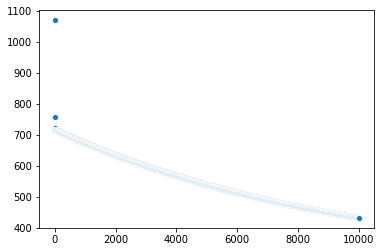

In [17]:
numEpochs= 10000
alpha = 0.0002
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=600/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise